<a href="https://colab.research.google.com/github/nzs5368/DS200-wk1-lec/blob/main/Copy_of_Week_1_Lec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Data Science





*   Large and diverse data sets are prevalent in the modern world
*   Data science is about utilizing these vast data sets to understand patterns and make smarter decisions
*  Exploration: identifying patterns, visualization, and descriptive statistics
*  Prediction: informed guesses, machine learning, and optimization 
*  Inference: Quantifying accuracy, statistical tests and modeling 



## Computationial Tools & Statistical Techniques



*   We will use Python 3, along with various libraries containing tools for data visualization, data management, and machine learning
*   GoogleColab and Jupyter Notebooks
*  We need to understand core statistical concepts such as: testing hypotheses, estimating confidence, and predicting unknown quantities.
*  Leverage our computational tools to apply these statistical methods to a variety of data



## Why Data Science?

# Plotting the Classics

This is a simple example meant to demonstrate the application of basic data visualization techniques to a large text dataset.  It will seem quick and simple, but we are drawing conclusions from a large text data set, showing the computational power at our disposal!

In this example, we will explore statistics for two classic novels: The Adventures of Huckleberry Finn by Mark Twain, and Little Women by Louisa May Alcott. The text of any book can be read by a computer at great speed. Books published before 1923 are currently in the public domain, meaning that everyone has the right to copy or use the text in any way. Project Gutenberg is a website that publishes public domain books online. Using Python, we can load the text of these books directly from the web.

This example is meant to illustrate some of the broad themes of this text. Don't worry if the details of the program don't yet make sense. Instead, focus on interpreting the images generated below. Later sections of the text will describe most of the features of the Python programming language used below.

First, we read the text of both books into lists of chapters, called huck_finn_chapters and little_women_chapters. In Python, a name cannot contain any spaces, and so we will often use an underscore _ to stand in for a space. The = in the lines below give a name on the left to the result of some computation described on the right. A uniform resource locator or URL is an address on the Internet for some content; in this case, the text of a book. The # symbol starts a comment, which is ignored by the computer but helpful for people reading the code.

In [2]:
# Stuff that will appear at the top of notebooks;
# You don't have to understand how this works or change it for now.

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [3]:
# read the books
huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

While a computer cannot understand the text of a book, it can provide us with some insight into the structure of the text. The name huck_finn_chapters is currently bound to a list of all the chapters in the book. We can place them into a table to see how each chapter begins.

In [4]:
# Display the chapters of Huckleberry Finn in a table.

Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


Each chapter begins with a chapter number in Roman numerals, followed by the first sentence of the chapter. Project Gutenberg has printed the first word of each chapter in upper case.

### Literary Characters

The Adventures of Huckleberry Finn describes a journey that Huck and Jim take along the Mississippi River. Tom Sawyer joins them towards the end as the action heats up. Having loaded the text, we can quickly visualize how many times these characters have each been mentioned at any point in the book.

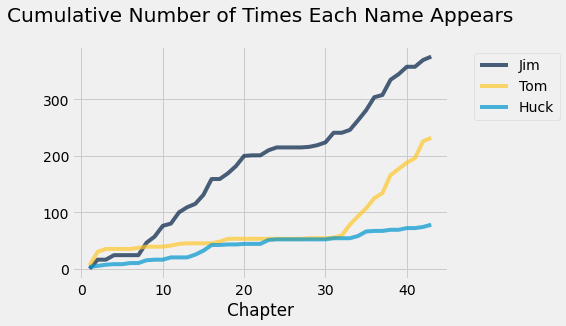

In [5]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter.

counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);

In the plot above, the horizontal axis shows chapter numbers and the vertical axis shows how many times each character has been mentioned up to and including that chapter.

You can see that Jim is a central character by the large number of times his name appears. Notice how Tom is hardly mentioned for much of the book until he arrives and joins Huck and Jim, after Chapter 30. His curve and Jim's rise sharply at that point, as the action involving both of them intensifies. As for Huck, his name hardly appears at all, because he is the narrator.

Little Women is a story of four sisters growing up together during the civil war. In this book, chapter numbers are spelled out and chapter titles are written in all capital letters.

In [6]:
# The chapters of Little Women, in a table

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


We can track the mentions of main characters to learn about the plot of this book as well. The protagonist Jo interacts with her sisters Meg, Beth, and Amy regularly, up until Chapter 27 when she moves to New York alone.

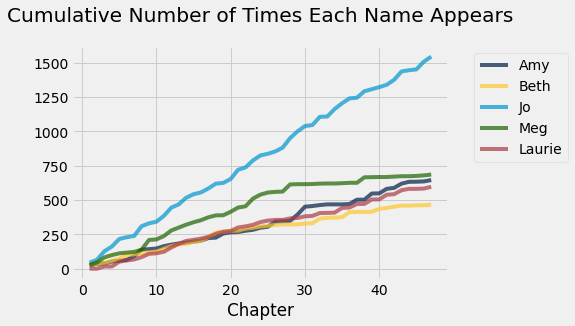

In [7]:
# Counts of character names in Little Women

counts = Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),

    ])

# Plot the cumulative counts.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);

Laurie is a young man who marries one of the girls in the end. See if you can use the plots to guess which one.

### Another Kind of Character 

In some situations, the relationships between quantities allow us to make predictions. This text will explore how to make accurate predictions based on incomplete information and develop methods for combining multiple sources of uncertain information to make decisions.

As an example of visualizing information derived from multiple sources, let us first use the computer to get some information that would be tedious to acquire by hand. In the context of novels, the word "character" has a second meaning: a printed symbol such as a letter or number or punctuation symbol. Here, we ask the computer to count the number of characters and the number of periods in each chapter of both *Huckleberry Finn* and *Little Women*.

In [8]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

Here are the data for *Huckleberry Finn*. Each row of the table corresponds to one chapter of the novel and displays the number of characters as well as the number of periods in the chapter. Not surprisingly, chapters with fewer characters also tend to have fewer periods, in general: the shorter the chapter, the fewer sentences there tend to be, and vice versa. The relation is not entirely predictable, however, as sentences are of varying lengths and can involve other punctuation such as question marks.

In [9]:
chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


Similarly, for *Little Women*.

In [10]:
chars_periods_little_women

Little Women Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


You can see that the chapters of *Little Women* are in general longer than those of *Huckleberry Finn*. Let us see if these two simple variables – the length and number of periods in each chapter – can tell us anything more about the two books. One way to do this is to plot both sets of data on the same axes.

In the plot below, there is a dot for each chapter in each book. Blue dots correspond to *Huckleberry Finn* and gold dots to *Little Women*. The horizontal axis represents the number of periods and the vertical axis represents the number of characters.

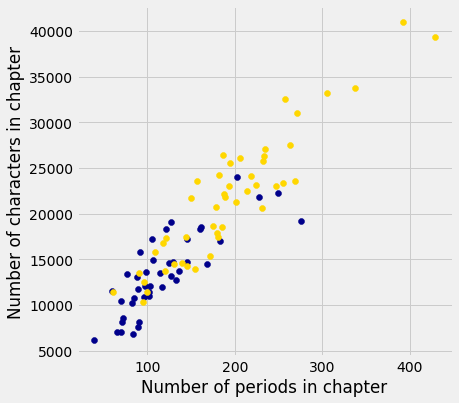

In [11]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1), 
              chars_periods_huck_finn.column(0), 
              color='darkblue')
plots.scatter(chars_periods_little_women.column(1), 
              chars_periods_little_women.column(0), 
              color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

The plot shows us that many but not all of the chapters of Little Women are longer than those of Huckleberry Finn, as we had observed by just looking at the numbers. But it also shows us something more. Notice how the blue points are roughly clustered around a straight line, as are the yellow points. Moreover, it looks as though both colors of points might be clustered around the same straight line.

Now look at all the chapters that contain about 100 periods. The plot shows that those chapters contain about 10,000 characters to about 15,000 characters, roughly. That's about 100 to 150 characters per period.

Indeed, it appears from looking at the plot that on average both books tend to have somewhere between 100 and 150 characters between periods, as a very rough estimate. Perhaps these two great 19th century novels were signaling something so very familiar to us now: the 140-character limit of Twitter.

# Programming in Python

We now introduce some basics of programming in Python.  Be sure to run the code right below us in order to set up for the code we are about to use.



In [13]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Expressions and Names

Programs are made up of expressions, which describe to the computer how to combine pieces of data. For example, a multiplication expression consists of a * symbol between two numerical expressions. Expressions, such as 3 * 4, are evaluated by the computer. The value (the result of evaluation) of the last expression in each cell, 12 in this case, is displayed below the cell.

In [15]:
# basic arithmetic
2 + 9

1

In [17]:
2 * 9

18

In [16]:
2 / 9


0.2222222222222222

In [ ]:
2 + 3 * 9


In [21]:
(2 + 3) * 9

45

In [22]:
# 2 to the 4th (2^4)
2 ** 4

16

In [23]:
# getting remainders
7 % 3

1

In [25]:
'hello class'

'hello class'

Names are given to values in Python using an assignment statement. In an assignment, a name is followed by =, which is followed by any expression. The value of the expression to the right of = is assigned to the name. Once a name has a value assigned to it, the value will be substituted for that name in future expressions.

In [26]:
a = 10
b = 20
a + b

30

A previously assigned name can be used in the expression to the right of =.

In [ ]:
quarter = 1/4
half = 2 * quarter
half

Names must start with a letter, but can contain both letters and numbers. A name cannot contain a space; instead, it is common to use an underscore character _ to replace each space. Names are only as useful as you make them; it's up to the programmer to choose names that are easy to interpret. Typically, more meaningful names can be invented than a and b. For example, to describe the sales tax on a $5 purchase in Berkeley, CA, the following names clarify the meaning of the various quantities involved.

In [ ]:
purchase_price = 5
state_tax_rate = 0.075
county_tax_rate = 0.02
city_tax_rate = 0
sales_tax_rate = state_tax_rate + county_tax_rate + city_tax_rate
sales_tax = purchase_price * sales_tax_rate
sales_tax

You can read the growth rates example in 3.2.1 of the textbook for a brief example demonstrating more expressions and names, but the two concepts are relatively straightforward.



## Call Expressions

Call expressions invoke functions, which are named operations. The name of the function appears first, followed by expressions in parentheses.

In [27]:
abs(-12)

12

In [28]:
round(5 - 1.3)

4

In [29]:
max(2, 2 + 3, 4)

5

A few functions are available by default, such as abs and round, but most functions that are built into the Python language are stored in a collection of functions called a module. An import statement is used to provide access to a module, such as math or operator.

In [30]:
import math
import operator
math.sqrt(operator.add(4, 5))

3.0

An equivalent expression could be expressed using the + and ** operators instead.

In [31]:
(4 + 5) ** 0.5

3.0

Operators and call expressions can be used together in an expression. For example, in 2014 Florida farms produced 2.72 billion eggs while Iowa farms produced 16.25 billion eggs (http://quickstats.nass.usda.gov/). The percent difference is 100 times the absolute value of the difference between the values, divided by their average. In this case, the difference is larger than the average, and so the percent difference is greater than 100.

In [32]:
florida = 2.72
iowa = 16.25
100*abs(florida-iowa)/((florida+iowa)/2)

142.6462836056932

Learning how different functions behave is an important part of learning a programming language. A Jupyter notebook can assist in remembering the names and effects of different functions. When editing a code cell, press the tab key after typing the beginning of a name to bring up a list of ways to complete that name. For example, press tab after math. to see all of the functions available in the math module. Typing will narrow down the list of options. To learn more about a function, place a ? after its name. For example, typing math.log? will bring up a description of the log function in the math module.

In [39]:
math.log?

The square brackets in the example call indicate that an argument is optional. That is, log can be called with either one or two arguments.

## Introduction to Tables

We can now apply Python to analyze data. We will work with data stored in Table structures.

Tables are a fundamental way of representing data sets. A table can be viewed in two ways:
* a sequence of named columns that each describe a single attribute of all entries in a data set, or
* a sequence of rows that each contain all information about a single individual in a data set.

We will study tables in great detail in the next several chapters. For now, we will just introduce a few methods without going into technical details. 

The table `cones` has been imported for us; later we will see how, but here we will just work with it. First, let's take a look at it.

In [59]:

from datascience import *
path_data = 'http://personal.psu.edu/drh20/200DS/'
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

cones = Table.read_table(path_data + 'cones.csv')
nba = Table.read_table(path_data + 'nba_salaries.csv').relabeled(3, 'SALARY')
movies = Table.read_table(path_data + 'movies_by_year.csv')

In [38]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


The table has six rows. Each row corresponds to one ice cream cone. The ice cream cones are the *individuals*.

Each cone has three attributes: flavor, color, and price. Each column contains the data on one of these attributes, and so all the entries of any single column are of the same kind. Each column has a label. We will refer to columns by their labels.

A table method is just like a function, but it must operate on a table. So the call looks like

`name_of_table.method(arguments)`

For example, if you want to see just the first two rows of a table, you can use the table method `show`.

In [41]:
cones.show(2)

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75


You can replace 2 by any number of rows. If you ask for more than six, you will only get six, because `cones` only has six rows.

### Choosing Sets of Columns ###
The method `select` creates a new table consisting of only the specified columns.

In [ ]:
cones.select('Flavor')

Flavor
strawberry
chocolate
chocolate
strawberry
chocolate
bubblegum


This leaves the original table unchanged.

In [42]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


You can select more than one column, by separating the column labels by commas.

In [43]:
cones.select('Flavor', 'Price')

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


You can also *drop* columns you don't want. The table above can be created by dropping the `Color` column.

In [44]:
cones.drop('Color')

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


You can name this new table and look at it again by just typing its name.

In [45]:
no_colors = cones.drop('Color')

no_colors

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


Like `select`, the `drop` method creates a smaller table and leaves the original table unchanged. In order to explore your data, you can create any number of smaller tables by using choosing or dropping columns. It will do no harm to your original data table.

### Sorting Rows ###

The `sort` method creates a new table by arranging the rows of the original table in ascending order of the values in the specified column. Here the `cones` table has been sorted in ascending order of the price of the cones.

In [47]:
cones.sort('Price')

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
bubblegum,pink,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25


To sort in descending order, you can use an *optional* argument to `sort`. As the name implies, optional arguments don't have to be used, but they can be used if you want to change the default behavior of a method. 

By default, `sort` sorts in increasing order of the values in the specified column. To sort in decreasing order, use the optional argument `descending=True`.

In [48]:
cones.sort('Price', descending=True)

Flavor,Color,Price
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75
chocolate,light brown,4.75
strawberry,pink,3.55


Like `select` and `drop`, the `sort` method leaves the original table unchanged.

### Selecting Rows that Satisfy a Condition ###
The `where` method creates a new table consisting only of the rows that satisfy a given condition. In this section we will work with a very simple condition, which is that the value in a specified column must be equal to a value that we also specify. Thus the `where` method has two arguments.

The code in the cell below creates a table consisting only of the rows corresponding to chocolate cones.

In [49]:
cones.where('Flavor', 'chocolate')

Flavor,Color,Price
chocolate,light brown,4.75
chocolate,dark brown,5.25
chocolate,dark brown,5.25


The arguments, separated by a comma, are the label of the column and the value we are looking for in that column. The `where` method can also be used when the condition that the rows must satisfy is more complicated. In those situations the call will be a little more complicated as well.

It is important to provide the value exactly. For example, if we specify `Chocolate` instead of `chocolate`, then `where` correctly finds no rows where the flavor is `Chocolate`.

In [50]:
cones.where('Flavor', 'Chocolate')

Flavor,Color,Price


Like all the other table methods in this section, `where` leaves the original table unchanged.

### Example: Salaries in the NBA ###

"The NBA is the highest paying professional sports league in the world," [reported CNN](http://edition.cnn.com/2015/12/04/sport/gallery/highest-paid-nba-players/) in March 2016. The table `nba` contains the [salaries of all National Basketball Association players](https://www.statcrunch.com/app/index.php?dataid=1843341) in 2015-2016.

Each row represents one player. The columns are:

| **Column Label**   | Description                                         |
|--------------------|-----------------------------------------------------|
| `PLAYER`           | Player's name                                       |
| `POSITION`         | Player's position on team                           |
| `TEAM`             | Team name                                           |
|`SALARY`    | Player's salary in 2015-2016, in millions of dollars|
 
The code for the positions is PG (Point Guard), SG (Shooting Guard), PF (Power Forward), SF (Small Forward), and C (Center). But what follows doesn't involve details about how basketball is played.

The first row shows that Paul Millsap, Power Forward for the Atlanta Hawks, had a salary of almost $\$18.7$ million in 2015-2016.

In [51]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


Fans of Stephen Curry can find his row by using `where`.

In [52]:
nba.where('PLAYER', 'Stephen Curry')

PLAYER,POSITION,TEAM,SALARY
Stephen Curry,PG,Golden State Warriors,11.3708


We can also create a new table called `warriors` consisting of just the data for the Golden State Warriors.

In [57]:
warriors = nba.where('TEAM', 'Golden State Warriors')
warriors

PLAYER,POSITION,TEAM,SALARY
Khris Middleton,SG,Milwaukee Bucks,14.7
O.J. Mayo,SG,Milwaukee Bucks,8
Greivis Vasquez,PG,Milwaukee Bucks,6.6
Jabari Parker,PF,Milwaukee Bucks,5.15244
Jerryd Bayless,PG,Milwaukee Bucks,3
John Henson,PF,Milwaukee Bucks,2.94322
Michael Carter-Williams,PG,Milwaukee Bucks,2.39904
Miles Plumlee,C,Milwaukee Bucks,2.10929
Giannis Antetokounmpo,SF,Milwaukee Bucks,1.95396
Rashad Vaughn,SG,Milwaukee Bucks,1.73304


By default, the first 10 lines of a table are displayed. You can use `show` to display more or fewer. To display the entire table, use `show` with no argument in the parentheses.

In [54]:
warriors.show()

PLAYER,POSITION,TEAM,SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


The `nba` table is sorted in alphabetical order of the team names. To see how the players were paid in 2015-2016, it is useful to sort the data by salary. Remember that by default, the sorting is in increasing order.

In [55]:
nba.sort('SALARY')

PLAYER,POSITION,TEAM,SALARY
Thanasis Antetokounmpo,SF,New York Knicks,0.030888
Jordan McRae,SG,Phoenix Suns,0.049709
Cory Jefferson,PF,Phoenix Suns,0.049709
Elliot Williams,SG,Memphis Grizzlies,0.055722
Orlando Johnson,SG,Phoenix Suns,0.055722
Phil Pressey,PG,Phoenix Suns,0.055722
Keith Appling,PG,Orlando Magic,0.061776
Sean Kilpatrick,SG,Denver Nuggets,0.099418
Erick Green,PG,Utah Jazz,0.099418
Jeff Ayres,PF,Los Angeles Clippers,0.111444


These figures are somewhat difficult to compare as some of these players changed teams during the season and received salaries from more than one team; only the salary from the last team appears in the table.  

The CNN report is about the other end of the salary scale – the players who are among the highest paid in the world. To identify these players we can sort in descending order of salary and look at the top few rows.

In [56]:
nba.sort('SALARY', descending=True)

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931
Dwyane Wade,SG,Miami Heat,20


Kobe Bryant, since retired, was the highest earning NBA player in 2015-2016.

# Data Types

Every value has a type, and the built-in `type` function returns the type of the result of any expression.

One type we have encountered already is a built-in function. Python indicates that the type is a `builtin_function_or_method`; the distinction between a *function* and a *method* is not important at this stage.

In [ ]:
type(abs)

builtin_function_or_method

This chapter will explore many useful types of data.

## Numbers

Computers are designed to perform numerical calculations, but there are some important details about working with numbers that every programmer working with quantitative data should know. Python (and most other programming languages) distinguishes between two different types of numbers:

* Integers are called `int` values in the Python language. They can only represent whole numbers (negative, zero, or positive) that don't have a fractional component
* Real numbers are called `float` values (or *floating point values*) in the Python language. They can represent whole or fractional numbers but have some limitations.

The type of a number is evident from the way it is displayed: `int` values have no decimal point and `float` values always have a decimal point. 

In [ ]:
# Some int values
2

2

In [ ]:
1 + 3

4

In [ ]:
-1234567890000000000

-1234567890000000000

In [ ]:
# Some float values
1.2

1.2

In [ ]:
3.0

3.0

When a `float` value is combined with an `int` value using some arithmetic operator, then the result is always a `float` value. In most cases, two integers combine to form another integer, but any number (`int` or `float`) divided by another will be a `float` value. Very large or very small `float` values are displayed using scientific notation.

In [ ]:
1.5 + 2

3.5

In [ ]:
3 / 1

3.0

In [ ]:
-12345678900000000000.0

-1.23456789e+19

The `type` function can be used to find the type of any number.

In [ ]:
type(3)

int

In [ ]:
type(3 / 1)

float

The `type` of an expression is the type of its final value. So, the `type` function will never indicate that the type of an expression is a name, because names are always evaluated to their assigned values.

In [ ]:
x = 3
type(x) # The type of x is an int, not a name

int

In [ ]:
type(x + 2.5)

float

### More About Float Values

Float values are very flexible, but they do have limits. 

1. A `float` can represent extremely large and extremely small numbers. There are limits, but you will rarely encounter them.
2. A `float` only represents 15 or 16 significant digits for any number; the remaining precision is lost. This limited precision is enough for the vast majority of applications.
3. After combining `float` values with arithmetic, the last few digits may be incorrect. Small rounding errors are often confusing when first encountered.

The first limit can be observed in two ways. If the result of a computation is a very large number, then it is represented as infinite. If the result is a very small number, then it is represented as zero.

In [ ]:
2e306 * 10

2e+307

In [ ]:
2e306 * 100

inf

In [ ]:
2e-322 / 10

2e-323

In [ ]:
2e-322 / 100

0.0

The second limit can be observed by an expression that involves numbers with more than 15 significant digits. These extra digits are discarded before any arithmetic is carried out.

In [ ]:
0.6666666666666666 - 0.6666666666666666123456789

0.0

The third limit can be observed when taking the difference between two expressions that should be equivalent. For example, the expression `2 ** 0.5` computes the square root of 2, but squaring this value does not exactly recover 2.

In [ ]:
2 ** 0.5

1.4142135623730951

In [ ]:
(2 ** 0.5) * (2 ** 0.5)

2.0000000000000004

In [ ]:
(2 ** 0.5) * (2 ** 0.5) - 2

4.440892098500626e-16

The final result above is `0.0000000000000004440892098500626`, a number that is very close to zero. The correct answer to this arithmetic expression is 0, but a small error in the final significant digit appears very different in scientific notation. This behavior appears in almost all programming languages because it is the result of the standard way that arithmetic is carried out on computers. 

Although `float` values are not always exact, they are certainly reliable and work the same way across all different kinds of computers and programming languages. 

## Strings

Much of the world's data is text, and a piece of text represented in a computer is called a *string*. A string can represent a word, a sentence, or even the contents of every book in a library. Since text can include numbers (like this: 5) or truth values (True), a string can also describe those things.

The meaning of an expression depends both upon its structure and the types of values that are being combined. So, for instance, adding two strings together produces another string. This expression is still an addition expression, but it is combining a different type of value.

In [ ]:
"data" + "science"

'datascience'

Addition is completely literal; it combines these two strings together without regard for their contents. It doesn't add a space because these are different words; that's up to the programmer (you) to specify.

In [ ]:
"data" + " " + "science"

'data science'

Single and double quotes can both be used to create strings: `'hi'` and `"hi"` are identical expressions. Double quotes are often preferred because they allow you to include apostrophes inside of strings.

In [ ]:
"This won't work with a single-quoted string!"

"This won't work with a single-quoted string!"

Why not? Try it out.

The `str` function returns a string representation of any value. Using this function, strings can be constructed that have embedded values.

In [ ]:
"That's " + str(1 + 1) + ' ' + str(True)

"That's 2 True"

### String Methods

From an existing string, related strings can be constructed using string methods, which are functions that operate on strings. These methods are called by placing a dot after the string, then calling the function.

For example, the following method generates an uppercased version of a string.

In [ ]:
"loud".upper()

'LOUD'

Perhaps the most important method is `replace`, which replaces all instances of a substring within the string. The `replace` method takes two arguments, the text to be replaced and its replacement.

In [ ]:
'hitchhiker'.replace('hi', 'ma')

'matchmaker'

String methods can also be invoked using variable names, as long as those names are bound to strings. So, for instance, the following two-step process generates the word "degrade" starting from "train" by first creating "ingrain" and then applying a second replacement.

In [ ]:
s = "train"
t = s.replace('t', 'ing')
u = t.replace('in', 'de')
u

'degrade'

Note that the line `t = s.replace('t', 'ing')` doesn't change the string `s`, which is still "train".  The method call `s.replace('t', 'ing')` just has a value, which is the string "ingrain".

In [ ]:
s

'train'

This is the first time we've seen methods, but methods are not unique to strings.  As we will see shortly, other types of objects can have them.

## Comparisons

Boolean values most often arise from comparison operators. Python includes a variety of operators that compare values. For example, `3` is larger than `1 + 1`.

In [ ]:
3 > 1 + 1

True

The value `True` indicates that the comparison is valid; Python has confirmed this simple fact about the relationship between `3` and `1+1`. The full set of common comparison operators are listed below.

| Comparison         | Operator | True example | False Example |
|--------------------|----------|--------------|---------------|
| Less than          | <        | 2 < 3        | 2 < 2         |
| Greater than       | >        | 3>2          | 3>3           |
| Less than or equal | <=       | 2 <= 2       | 3 <= 2        |
| Greater or equal   | >=       | 3 >= 3       | 2 >= 3        |
| Equal              | ==       | 3 == 3       | 3 == 2        |
| Not equal          | !=       | 3 != 2       | 2 != 2        |

An expression can contain multiple comparisons, and they all must hold in order for the whole expression to be `True`. For example, we can express that `1+1` is between `1` and `3` using the following expression.

In [ ]:
1 < 1 + 1 < 3

True

The average of two numbers is always between the smaller number and the larger number. We express this relationship for the numbers `x` and `y` below. You can try different values of `x` and `y` to confirm this relationship.

In [ ]:
x = 12
y = 5
min(x, y) <= (x+y)/2 <= max(x, y)

True

Strings can also be compared, and their order is alphabetical. A shorter string is less than a longer string that begins with the shorter string.

In [ ]:
"Dog" > "Catastrophe" > "Cat"

True